### Reading dataframes and renaming columns to match

In [3]:
import pandas as pd
from datetime import date

today = '2022-09-21' #str(date.today())

xlistado = pd.read_csv('listado.csv')
xlistado = xlistado.rename(columns={'Ticker  en  mercado  de  origen':'ticker','Id  de  mercado':'ticker_arg'})

xdaily_csv = pd.read_csv(f'origin_tickets/origin_tickets_{today}.csv')
xdaily_csv = xdaily_csv.rename(columns={'01. symbol':'ticker'})

xarg_daily_csv = pd.read_csv(f'arg_tickets/arg_tickets_{today}.csv')
xarg_daily_csv = xarg_daily_csv.rename(columns={'Simbolo':'ticker_arg'})

### Merge dataframes from the API and "Listado" with Pandas

In [4]:
df1 = xlistado.merge(xdaily_csv, on='ticker')

df1.head(5)

,Programa de CEDEAR,Ratio Cedear / valor sub-yacente,ticker_arg,ticker,02. open,03. high,04. low,05. price,06. volume,07. latest trading day,08. previous close,09. change,10. change percent
0,3M CO,5:1,MMM,MMM,116.83,118.0300,114.80,114.81,3693062.0,2022-09-21,116.52,-1.71,-1.4676%
1,ABBOTT LABORATORIES,4:1,ABT,ABT,102.87,103.9200,100.62,100.65,4552978.0,2022-09-21,102.31,-1.66,-1.6225%
2,ABBVIE INC,10:1,ABBV,ABBV,142.15,143.6282,140.29,140.31,4941163.0,2022-09-21,141.77,-1.46,-1.0298%
3,ABERCROMBIE & FITCH CO-CL A,1:1,ANF,ANF,16.09,16.4600,15.59,15.59,1437058.0,2022-09-21,15.93,-0.34,-2.1343%
4,ADECOAGRO SA,2:1,ADGO,AGRO,8.45,8.6000,8.31,8.42,554893.0,2022-09-21,8.42,0.00,0.0000%


### Merge with Pandas from 3 previously generated dataframes

In [5]:
df2 = df1.merge(xarg_daily_csv, on='ticker_arg')

df2.head(5)

,Programa de CEDEAR,Ratio Cedear / valor sub-yacente,ticker_arg,ticker,02. open,03. high,04. low,05. price,06. volume,07. latest trading day,...,Precio_Compra,Precio_Promedio,Precio_Promedio_Ponderado,Precio_Venta,Tendencia,Tipo_Liquidacion,Ultimo,Variacion,Vencimiento,Volumen_Nominal
0,3M CO,5:1,MMM,MMM,116.83,118.0300,114.80,114.81,3693062.0,2022-09-21,...,6700.0,7149.9464,7154.7403,7227.0,-1,Pesos,7064.0,-0.48,48hs,3209
1,ABBOTT LABORATORIES,4:1,ABT,ABT,102.87,103.9200,100.62,100.65,4552978.0,2022-09-21,...,7000.0,7829.2400,7831.3539,7868.0,-1,Pesos,7706.5,0.46,48hs,741
2,ABBVIE INC,10:1,ABBV,ABBV,142.15,143.6282,140.29,140.31,4941163.0,2022-09-21,...,4100.0,4347.2653,4348.5451,5000.0,0,Pesos,4302.0,0.33,48hs,331
3,ABERCROMBIE & FITCH CO-CL A,1:1,ANF,ANF,16.09,16.4600,15.59,15.59,1437058.0,2022-09-21,...,4747.0,4838.5000,4838.5000,7408.0,0,Pesos,4838.5,1.64,48hs,1
4,ADECOAGRO SA,2:1,ADGO,AGRO,8.45,8.6000,8.31,8.42,554893.0,2022-09-21,...,500.0,5150.4490,5169.4270,5555.0,-1,Pesos,5147.5,0.83,48hs,826


### Splitting column of ratios and changing types

In [6]:
name = df2['Ratio  Cedear  /  valor  sub-yacente'].str.split(':',expand=True)
name.columns = ['Ratio Cedear', 'valor sub-yacente']
print(name.dtypes)

name = name.astype(float)
print(name.dtypes)

df = pd.concat([name, df2], axis=1)
df.head(5)

Ratio Cedear         object
valor sub-yacente    object
dtype: object
Ratio Cedear         float64
valor sub-yacente    float64
dtype: object


,Ratio Cedear,valor sub-yacente,Programa de CEDEAR,Ratio Cedear / valor sub-yacente,ticker_arg,ticker,02. open,03. high,04. low,05. price,...,Precio_Compra,Precio_Promedio,Precio_Promedio_Ponderado,Precio_Venta,Tendencia,Tipo_Liquidacion,Ultimo,Variacion,Vencimiento,Volumen_Nominal
0,5.0,1.0,3M CO,5:1,MMM,MMM,116.83,118.0300,114.80,114.81,...,6700.0,7149.9464,7154.7403,7227.0,-1,Pesos,7064.0,-0.48,48hs,3209
1,4.0,1.0,ABBOTT LABORATORIES,4:1,ABT,ABT,102.87,103.9200,100.62,100.65,...,7000.0,7829.2400,7831.3539,7868.0,-1,Pesos,7706.5,0.46,48hs,741
2,10.0,1.0,ABBVIE INC,10:1,ABBV,ABBV,142.15,143.6282,140.29,140.31,...,4100.0,4347.2653,4348.5451,5000.0,0,Pesos,4302.0,0.33,48hs,331
3,1.0,1.0,ABERCROMBIE & FITCH CO-CL A,1:1,ANF,ANF,16.09,16.4600,15.59,15.59,...,4747.0,4838.5000,4838.5000,7408.0,0,Pesos,4838.5,1.64,48hs,1
4,2.0,1.0,ADECOAGRO SA,2:1,ADGO,AGRO,8.45,8.6000,8.31,8.42,...,500.0,5150.4490,5169.4270,5555.0,-1,Pesos,5147.5,0.83,48hs,826


### Calculating real stocks value in Argentina with numpy

In [7]:
import numpy as np

last_price_arg = np.array(df[['Ultimo']])
ratio_value = np.array(df[['Ratio Cedear']])

total_price_arg = last_price_arg * ratio_value
df.insert(0, 'Valor total arg', total_price_arg)

df.head(5)

,Valor total arg,Ratio Cedear,valor sub-yacente,Programa de CEDEAR,Ratio Cedear / valor sub-yacente,ticker_arg,ticker,02. open,03. high,04. low,...,Precio_Compra,Precio_Promedio,Precio_Promedio_Ponderado,Precio_Venta,Tendencia,Tipo_Liquidacion,Ultimo,Variacion,Vencimiento,Volumen_Nominal
0,35320.0,5.0,1.0,3M CO,5:1,MMM,MMM,116.83,118.0300,114.80,...,6700.0,7149.9464,7154.7403,7227.0,-1,Pesos,7064.0,-0.48,48hs,3209
1,30826.0,4.0,1.0,ABBOTT LABORATORIES,4:1,ABT,ABT,102.87,103.9200,100.62,...,7000.0,7829.2400,7831.3539,7868.0,-1,Pesos,7706.5,0.46,48hs,741
2,43020.0,10.0,1.0,ABBVIE INC,10:1,ABBV,ABBV,142.15,143.6282,140.29,...,4100.0,4347.2653,4348.5451,5000.0,0,Pesos,4302.0,0.33,48hs,331
3,4838.5,1.0,1.0,ABERCROMBIE & FITCH CO-CL A,1:1,ANF,ANF,16.09,16.4600,15.59,...,4747.0,4838.5000,4838.5000,7408.0,0,Pesos,4838.5,1.64,48hs,1
4,10295.0,2.0,1.0,ADECOAGRO SA,2:1,ADGO,AGRO,8.45,8.6000,8.31,...,500.0,5150.4490,5169.4270,5555.0,-1,Pesos,5147.5,0.83,48hs,826


### Calculating dollar price in Argentina with shares

In [8]:
a = np.array(df[['Valor total arg']])
stock_price = np.array(df[['05. price']])

ccl_price = a / stock_price

df.insert(0, 'dolar_ccl', ccl_price)

df.head(5)

,dolar_ccl,Valor total arg,Ratio Cedear,valor sub-yacente,Programa de CEDEAR,Ratio Cedear / valor sub-yacente,ticker_arg,ticker,02. open,03. high,...,Precio_Compra,Precio_Promedio,Precio_Promedio_Ponderado,Precio_Venta,Tendencia,Tipo_Liquidacion,Ultimo,Variacion,Vencimiento,Volumen_Nominal
0,307.638707,35320.0,5.0,1.0,3M CO,5:1,MMM,MMM,116.83,118.0300,...,6700.0,7149.9464,7154.7403,7227.0,-1,Pesos,7064.0,-0.48,48hs,3209
1,306.269250,30826.0,4.0,1.0,ABBOTT LABORATORIES,4:1,ABT,ABT,102.87,103.9200,...,7000.0,7829.2400,7831.3539,7868.0,-1,Pesos,7706.5,0.46,48hs,741
2,306.606799,43020.0,10.0,1.0,ABBVIE INC,10:1,ABBV,ABBV,142.15,143.6282,...,4100.0,4347.2653,4348.5451,5000.0,0,Pesos,4302.0,0.33,48hs,331
3,310.359205,4838.5,1.0,1.0,ABERCROMBIE & FITCH CO-CL A,1:1,ANF,ANF,16.09,16.4600,...,4747.0,4838.5000,4838.5000,7408.0,0,Pesos,4838.5,1.64,48hs,1
4,1222.684086,10295.0,2.0,1.0,ADECOAGRO SA,2:1,ADGO,AGRO,8.45,8.6000,...,500.0,5150.4490,5169.4270,5555.0,-1,Pesos,5147.5,0.83,48hs,826


### Preparing dataframe for graphs

  ticker    dolar_ccl
0    MMM   307.638707
1    ABT   306.269250
2   ABBV   306.606799
3    ANF   310.359205
4   AGRO  1222.684086


<AxesSubplot:xlabel='dolar_ccl', ylabel='ticker'>

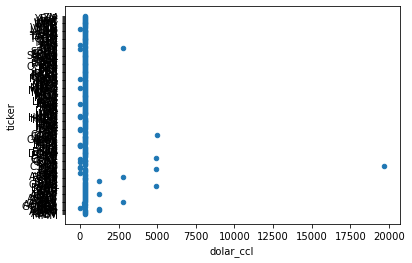

In [36]:
dfccl = df[['ticker', 'dolar_ccl']]
print(dfccl.head(5))

dfccl.plot.scatter('dolar_ccl', 'ticker')

### Removing out of range values


    Mean: 501
    Median: 307
    Mode: 0

    ticker   dolar_ccl
12   ACHHY  279.184783
9     BABA  292.185315
88    GPRK  300.988924
175     SE  303.506311
217     WB  303.844100
222     ZM  304.194101
130    LYG  304.265403
72    EBAY  304.341125
68     DEO  304.911795
125    KGC  304.943503


<AxesSubplot:xlabel='dolar_ccl', ylabel='ticker'>

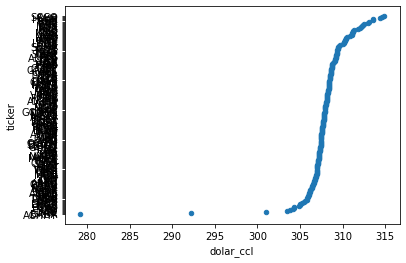

In [44]:
prom = dfccl['dolar_ccl'].mean()
media = dfccl['dolar_ccl'].median()
moda = dfccl['dolar_ccl'].mode()
print("""
    Mean: %d
    Median: %d
    Mode: %d
""" % (prom,media,moda))

dfccl_f = dfccl[(dfccl['dolar_ccl']>media*0.5) & (dfccl['dolar_ccl']<media*1.5)].sort_values(by=['dolar_ccl'])
print(dfccl_f.head(10))

dfccl_f.plot.scatter('dolar_ccl', 'ticker')

### Interactive graph with dollar price for each Cedear

In [43]:
import plotly.express as px

fig = px.line(dfccl_f, x="dolar_ccl", y="ticker")
fig.show()